In [68]:
import numpy as np
import h5py
from uatu.watchers import key_func

In [69]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [70]:
%%bash
ls -ltr /home/users/swmclau2/oak/Uatu/UatuLightconeTest/*huffle*.hdf5

-rw-rw----+ 1 swmclau2 sh_o-kipac 7609022888 Oct 25 04:31 /home/users/swmclau2/oak/Uatu/UatuLightconeTest/UatuLightconeAttackedShuffled.hdf5
-rw-rw----+ 1 swmclau2 sh_o-kipac   29952864 Oct 30 15:13 /home/users/swmclau2/oak/Uatu/UatuLightconeTest/UatuLightconePredsAdvShuffleAttack.hdf5
-rw-rw----+ 1 swmclau2 sh_o-kipac   29952864 Oct 30 15:41 /home/users/swmclau2/oak/Uatu/UatuLightconeTest/UatuLightconeShuffledAttack.hdf5
-rw-rw----+ 1 swmclau2 sh_o-kipac   29952864 Oct 31 11:55 /home/users/swmclau2/oak/Uatu/UatuLightconeTest/UatuLightconePresShuffleAttack.hdf5


In [71]:
fname = '/home/users/swmclau2/oak/Uatu/UatuLightconeTest/UatuLightconePresShuffleAttack.hdf5'
#fname = '/scratch/users/swmclau2/UatuLightconeTest/UatuLightconePredsTranspose.hdf5'

In [72]:
f = h5py.File(fname, 'r')

In [73]:
len(f.keys())

50

In [74]:
cosmo_preds = np.zeros((len(f.keys()), 4))
cosmo_true = np.zeros((len(f.keys()), 2))

Om_0.249085_s8_0.756841


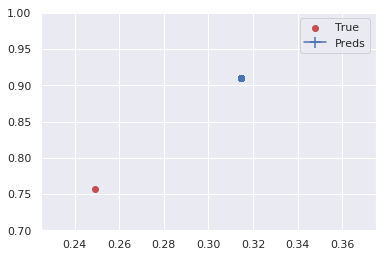

Om_0.252267_s8_0.774377


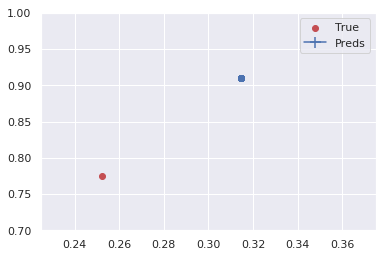

Om_0.255173_s8_0.779647


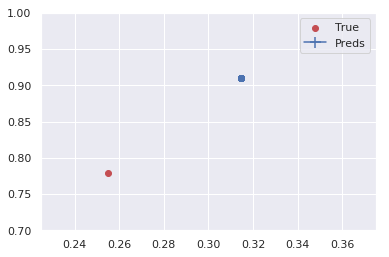

Om_0.255518_s8_0.767803


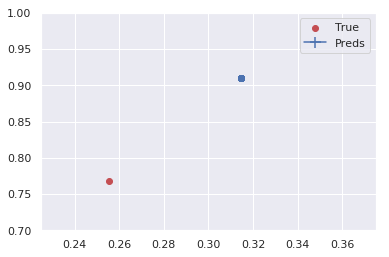

Om_0.256131_s8_0.754619


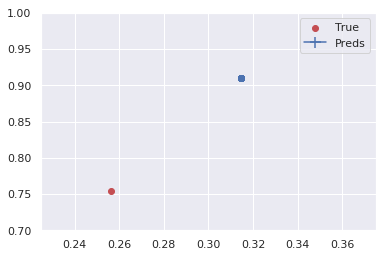

Om_0.258241_s8_0.803323


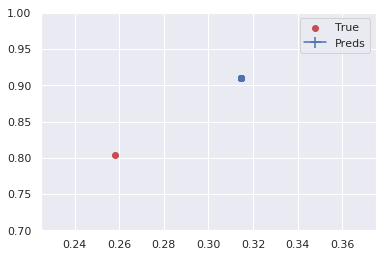

Om_0.260930_s8_0.758968


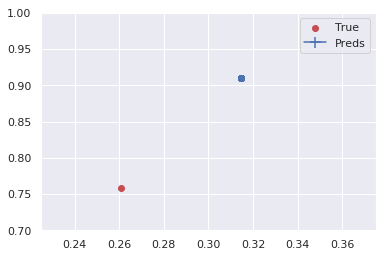

Om_0.264410_s8_0.798046


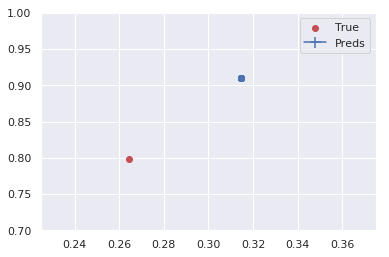

Om_0.264727_s8_0.763957


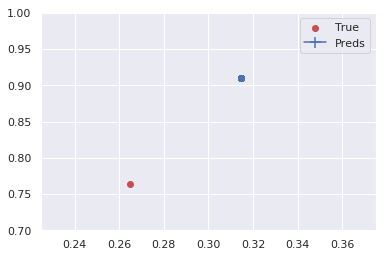

Om_0.264745_s8_0.763802


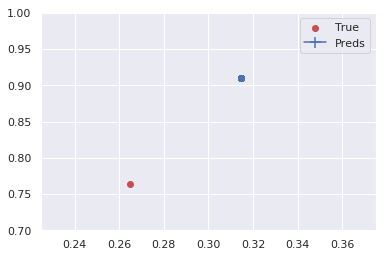

Om_0.266764_s8_0.798965


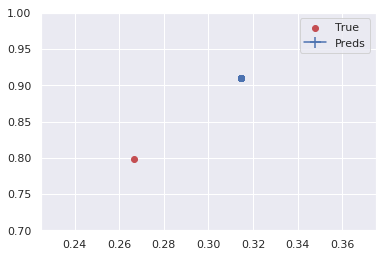

Om_0.270600_s8_0.804064


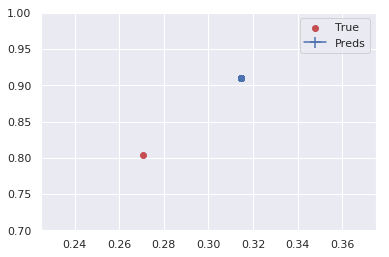

Om_0.273594_s8_0.812422


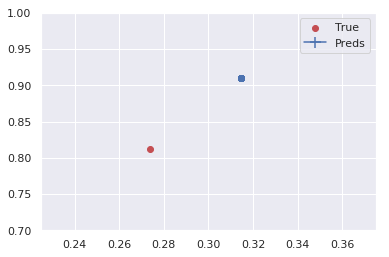

Om_0.273602_s8_0.800138


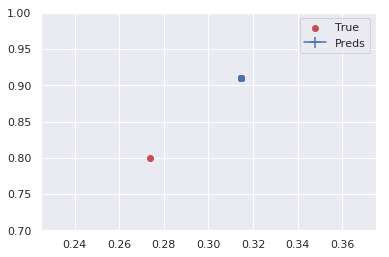

Om_0.277383_s8_0.822688


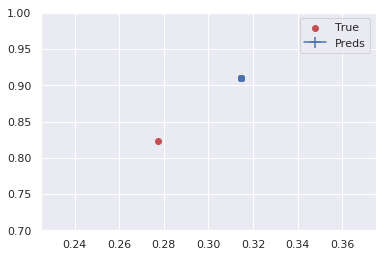

Om_0.277969_s8_0.816847


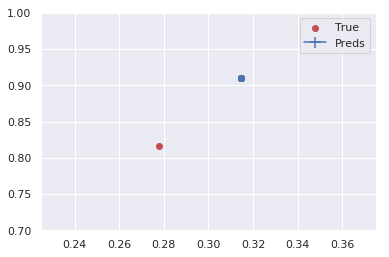

Om_0.278046_s8_0.831211


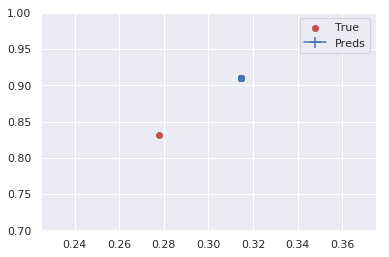

Om_0.289800_s8_0.834897


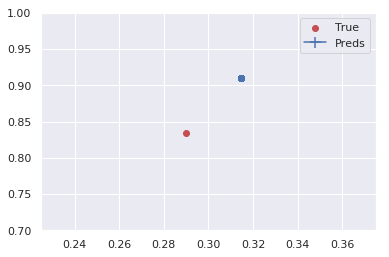

Om_0.290273_s8_0.865561


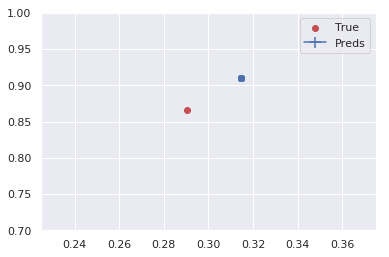

Om_0.293136_s8_0.858509


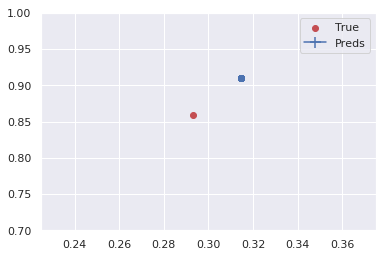

Om_0.293412_s8_0.878074


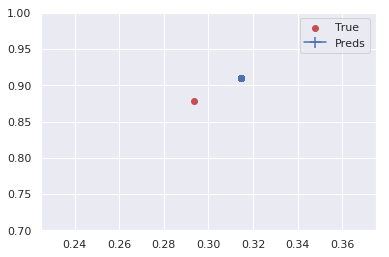

Om_0.299597_s8_0.872253


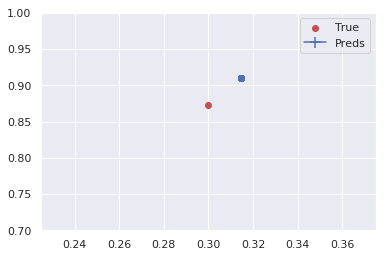

Om_0.300795_s8_0.879204


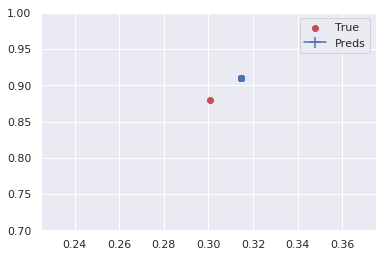

Om_0.303877_s8_0.865558


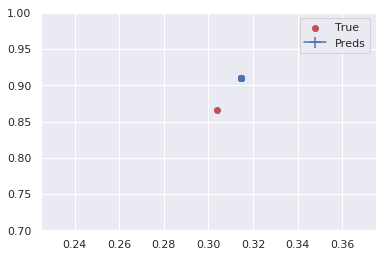

Om_0.303894_s8_0.857957


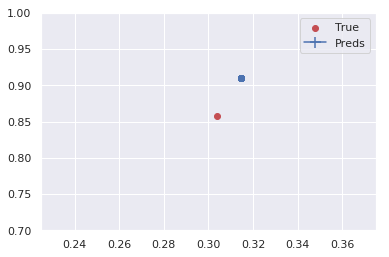

Om_0.305991_s8_0.859887


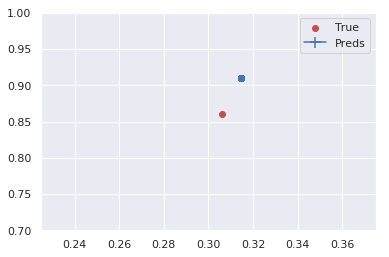

Om_0.309782_s8_0.918470


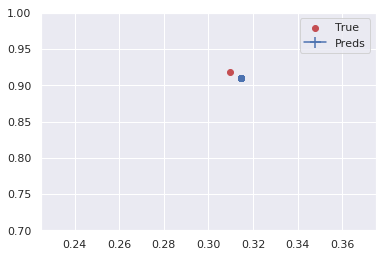

Om_0.311153_s8_0.909033


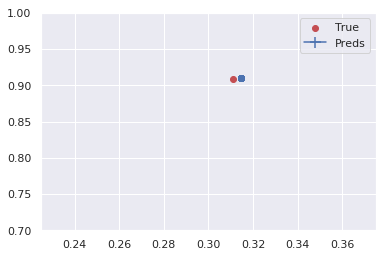

Om_0.311273_s8_0.897717


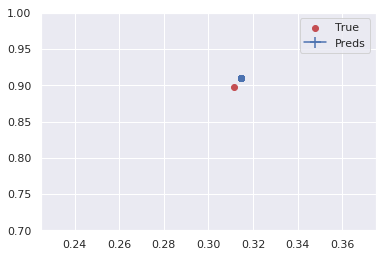

Om_0.312329_s8_0.906916


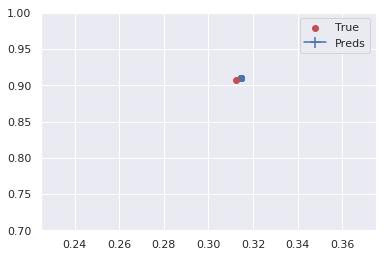

Om_0.315974_s8_0.894946


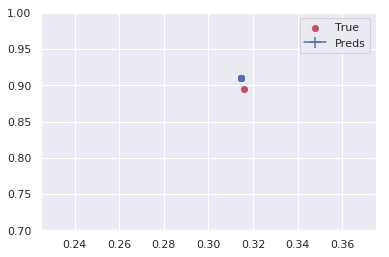

Om_0.317211_s8_0.915982


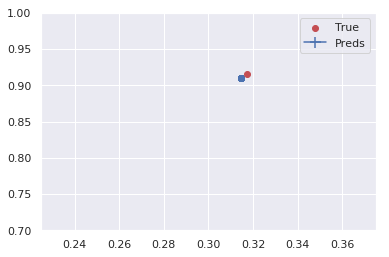

Om_0.317239_s8_0.923577


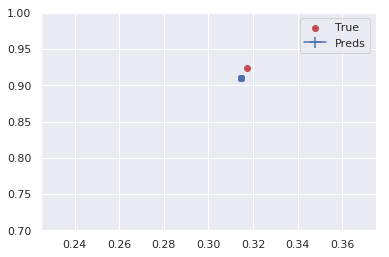

Om_0.319103_s8_0.909895


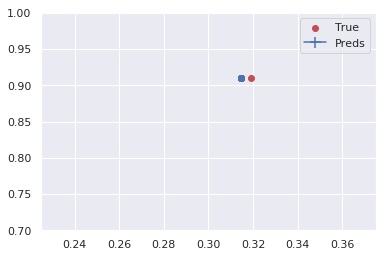

Om_0.319228_s8_0.924126


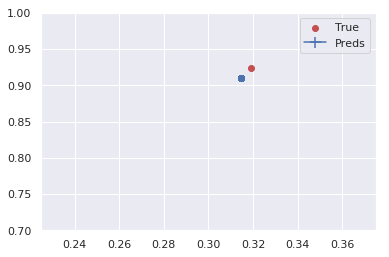

Om_0.321677_s8_0.896305


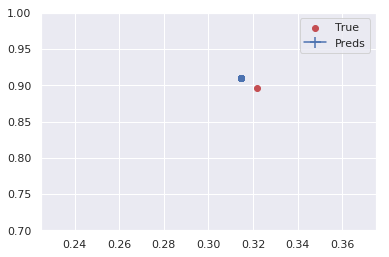

Om_0.321703_s8_0.934630


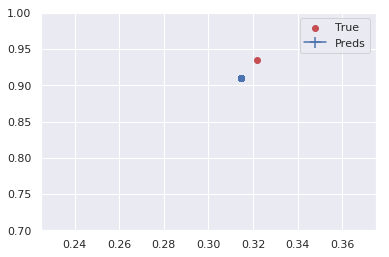

Om_0.329572_s8_0.907889


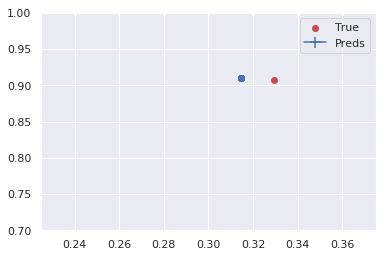

Om_0.329761_s8_0.919270


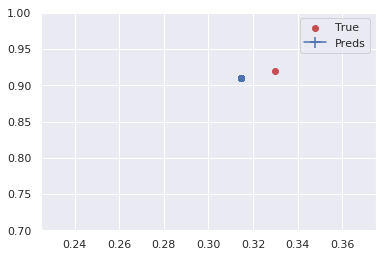

Om_0.329828_s8_0.921843


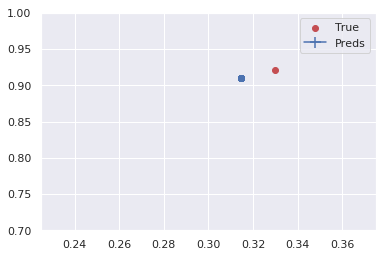

Om_0.329875_s8_0.913122


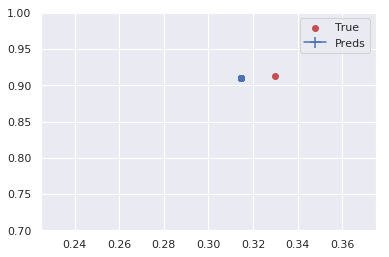

Om_0.332959_s8_0.950872


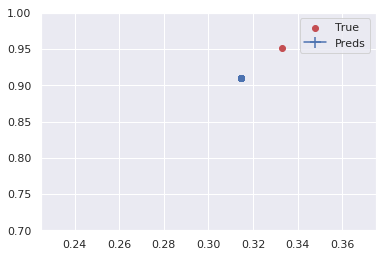

Om_0.336049_s8_0.949749


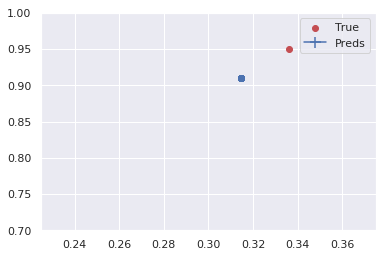

Om_0.342132_s8_0.954906


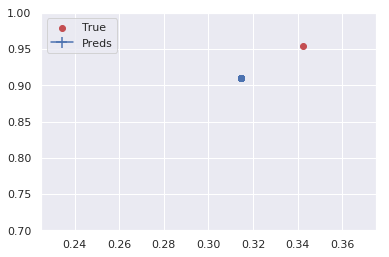

Om_0.344579_s8_0.959670


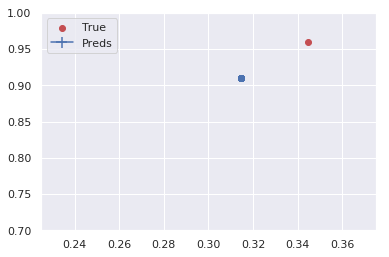

Om_0.345664_s8_0.959615


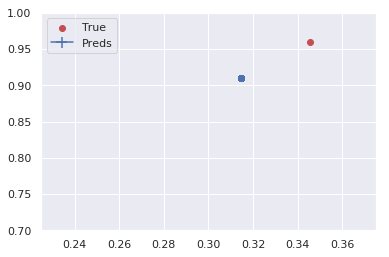

Om_0.346084_s8_0.963481


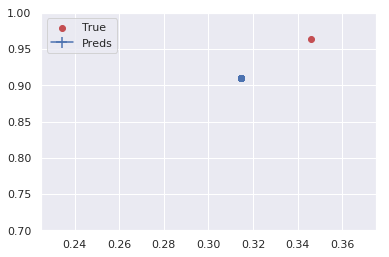

Om_0.346410_s8_0.971143


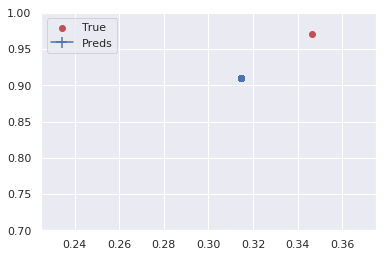

Om_0.348479_s8_0.946874


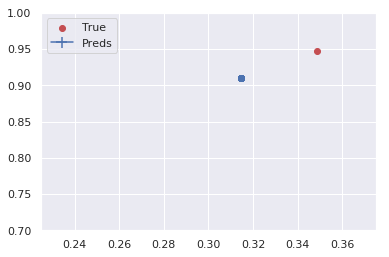

Om_0.349955_s8_0.982907


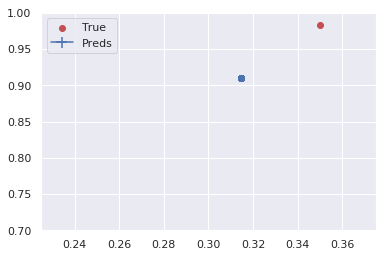

In [75]:
for cosmo_idx, true_val in enumerate(f.keys()):
    print true_val
    tvs = true_val.split('_')
    
    true_vals = np.array((float(tvs[1]), float(tvs[3]) )).reshape((1,2))
    preds = np.zeros((289, 2, 1))
    #preds = np.zeros((289, 2, 100))

    #continue
    #print true_val
    for idx, map in enumerate(f[key_func(true_vals)]):
        #print f[key_func(true_vals)][map].value.shape
        preds[idx,:] =  f[key_func(true_vals)][map].value.T[:2, :]
        #print preds[idx, 0, :]

        #print preds[idx]
        #pass
        if idx == 0:
            cosmo_true[cosmo_idx] = true_vals[0, :]
    #print preds.mean(axis = 0)
    plt.scatter(preds[:,0], preds[:,1], color = 'b', alpha = 0.1)

    plt.errorbar(preds[:,0].mean(), preds[:,1].mean(), yerr = preds[:,1].std(), xerr=preds[:,0].std(), color = 'b', label = 'Preds')
    
    cosmo_preds[cosmo_idx, :2] = preds.mean(axis = (0, 2))
    cosmo_preds[cosmo_idx,2:] = preds.std(axis = (0, 2))
    plt.scatter(true_vals[0,0], true_vals[0,1], color = 'r', label = 'True')
    
    plt.legend(loc='best')
    plt.xlim([0.225, 0.375])
    plt.ylim([0.7, 1.0])
    plt.show()

In [76]:
f.close()

In [77]:
fname = '/home/users/swmclau2/oak/Uatu/UatuLightconeTest/UatuLightconePredsAdvShuffleAttack.hdf5'
#fname = '/scratch/users/swmclau2/UatuLightconeTest/UatuLightconePreds.hdf5'

In [78]:
f = h5py.File(fname, 'r')

In [79]:
len(f.keys())

50

In [80]:
cosmo_preds_attacked = np.zeros_like(cosmo_preds)
cosmo_true_attacked = np.zeros_like(cosmo_true)

Om_0.249085_s8_0.756841


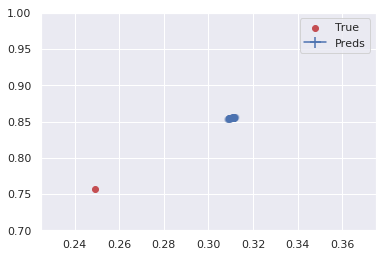

Om_0.252267_s8_0.774377


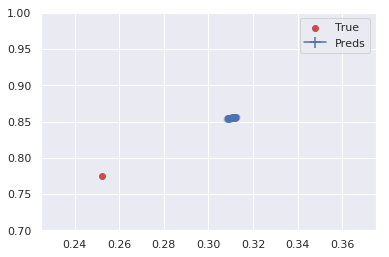

Om_0.255173_s8_0.779647


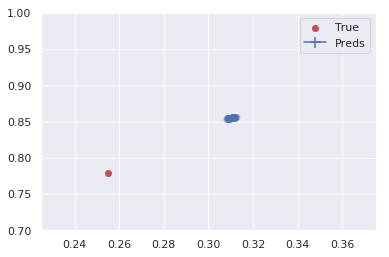

Om_0.255518_s8_0.767803


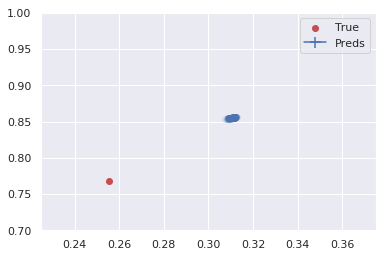

Om_0.256131_s8_0.754619


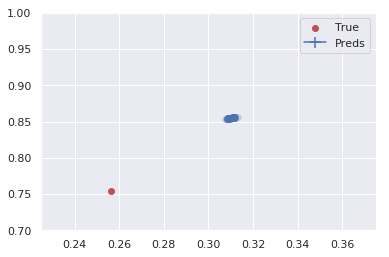

Om_0.258241_s8_0.803323


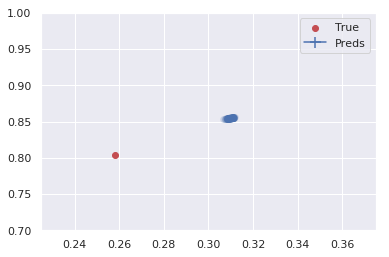

Om_0.260930_s8_0.758968


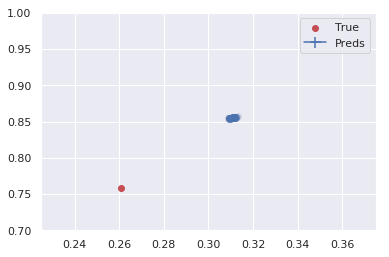

Om_0.264410_s8_0.798046


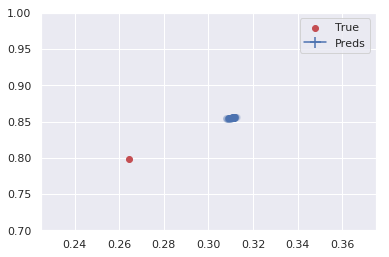

Om_0.264727_s8_0.763957


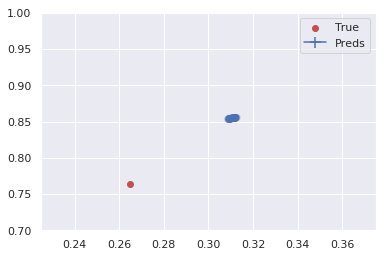

Om_0.264745_s8_0.763802


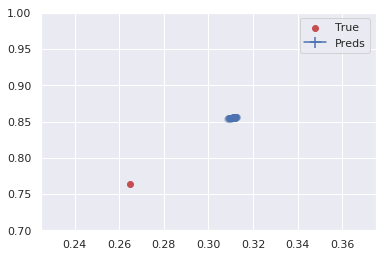

Om_0.266764_s8_0.798965


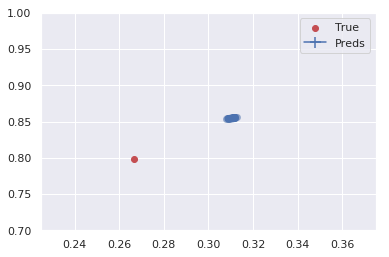

Om_0.270600_s8_0.804064


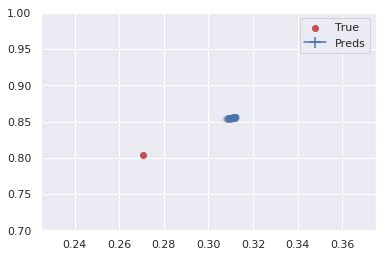

Om_0.273594_s8_0.812422


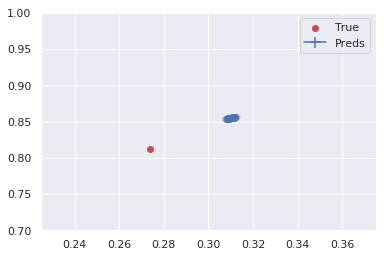

Om_0.273602_s8_0.800138


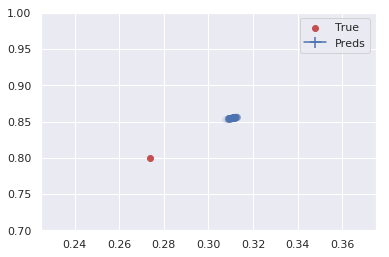

Om_0.277383_s8_0.822688


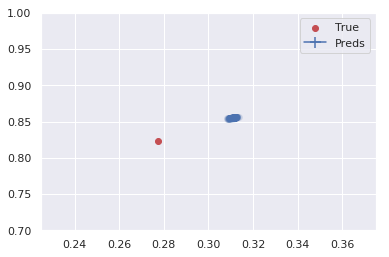

Om_0.277969_s8_0.816847


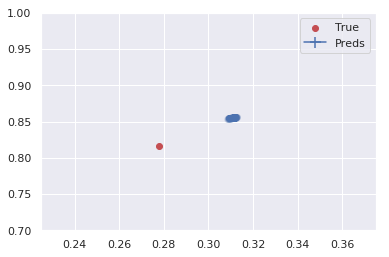

Om_0.278046_s8_0.831211


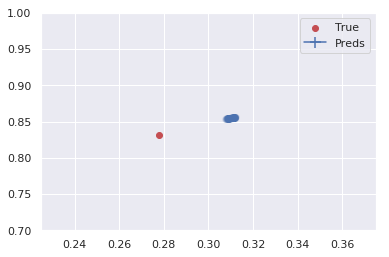

Om_0.289800_s8_0.834897


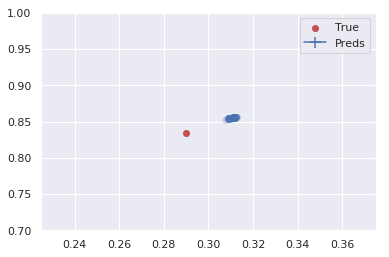

Om_0.290273_s8_0.865561


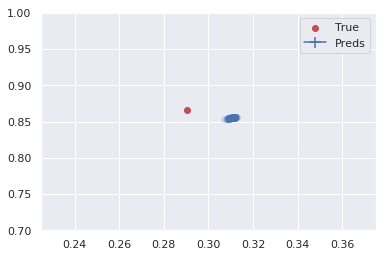

Om_0.293136_s8_0.858509


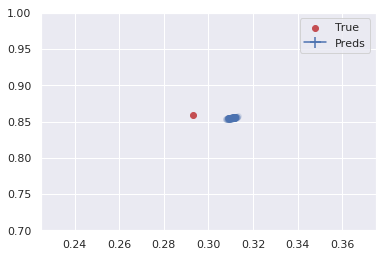

Om_0.293412_s8_0.878074


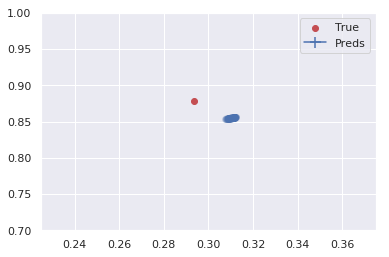

Om_0.299597_s8_0.872253


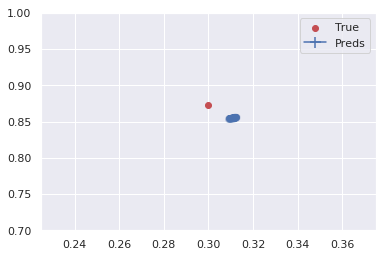

Om_0.300795_s8_0.879204


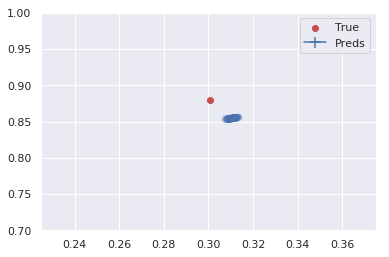

Om_0.303877_s8_0.865558


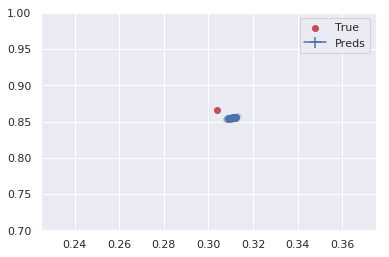

Om_0.303894_s8_0.857957


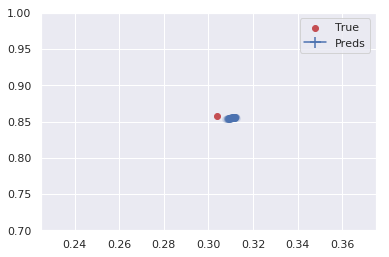

Om_0.305991_s8_0.859887


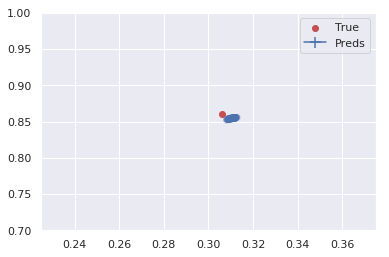

Om_0.309782_s8_0.918470


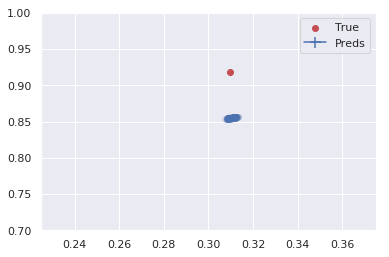

Om_0.311153_s8_0.909033


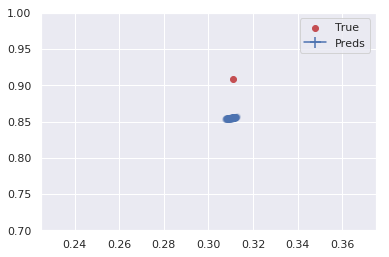

Om_0.311273_s8_0.897717


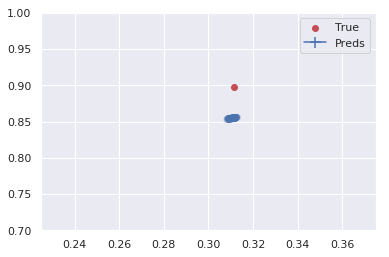

Om_0.312329_s8_0.906916


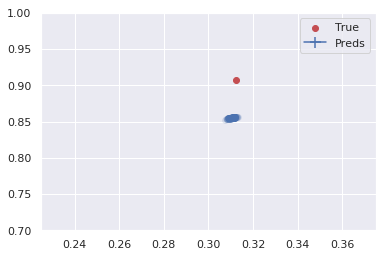

Om_0.315974_s8_0.894946


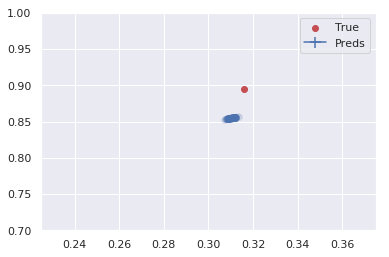

Om_0.317211_s8_0.915982


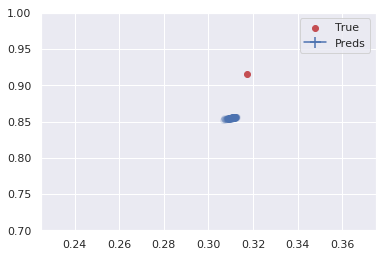

Om_0.317239_s8_0.923577


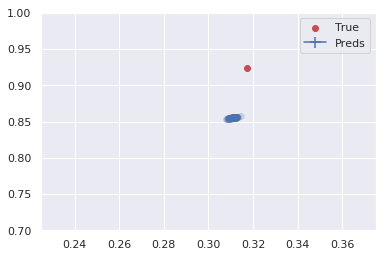

Om_0.319103_s8_0.909895


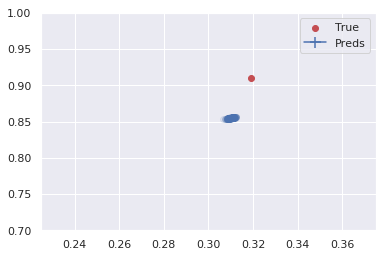

Om_0.319228_s8_0.924126


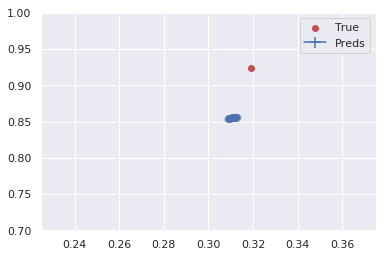

Om_0.321677_s8_0.896305


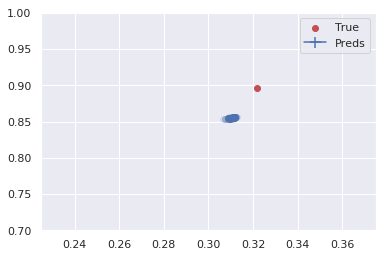

Om_0.321703_s8_0.934630


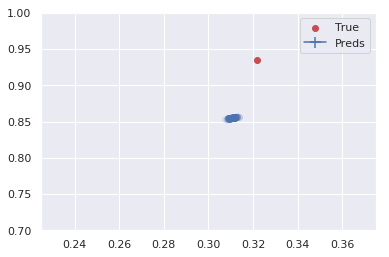

Om_0.329572_s8_0.907889


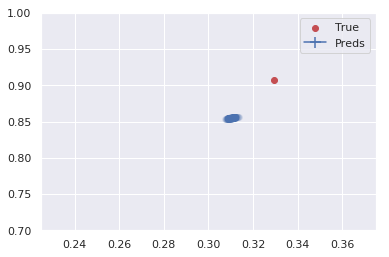

Om_0.329761_s8_0.919270


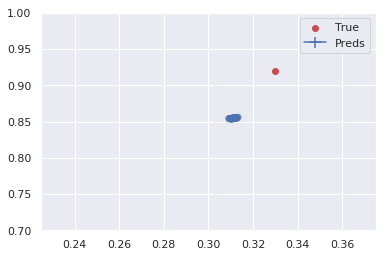

Om_0.329828_s8_0.921843


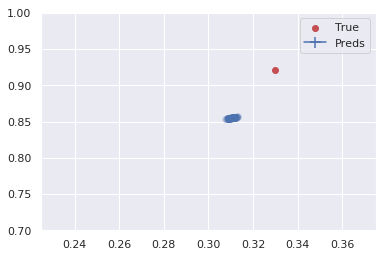

Om_0.329875_s8_0.913122


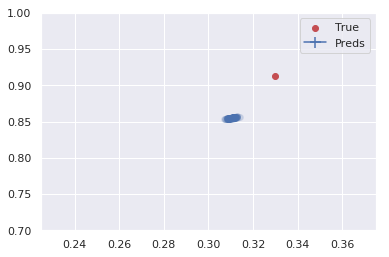

Om_0.332959_s8_0.950872


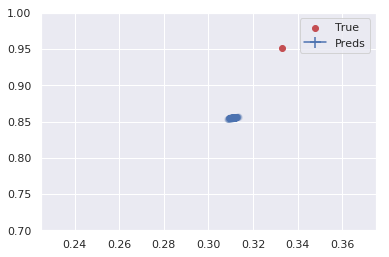

Om_0.336049_s8_0.949749


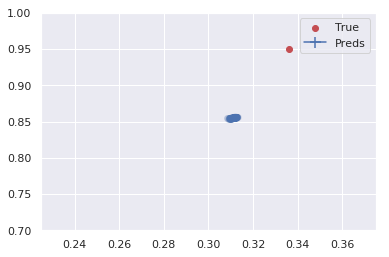

Om_0.342132_s8_0.954906


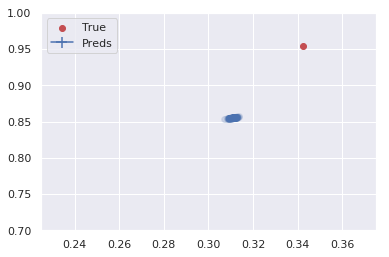

Om_0.344579_s8_0.959670


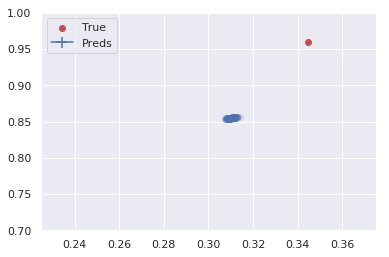

Om_0.345664_s8_0.959615


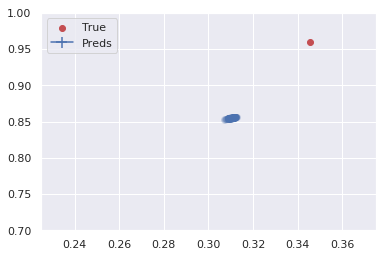

Om_0.346084_s8_0.963481


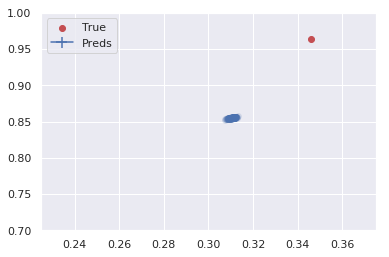

Om_0.346410_s8_0.971143


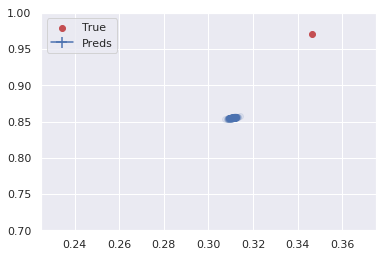

Om_0.348479_s8_0.946874


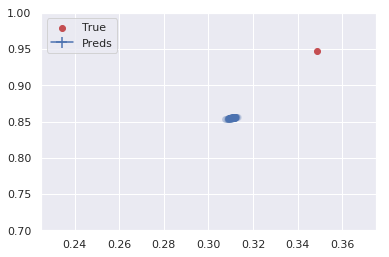

Om_0.349955_s8_0.982907


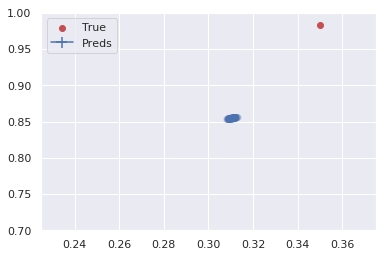

In [81]:
for cosmo_idx, true_val in enumerate(f.keys()):
    print true_val
    tvs = true_val.split('_')
    
    true_vals = np.array((float(tvs[1]), float(tvs[3]) )).reshape((1,2))
    preds = np.zeros((289, 2, 1))
    #preds = np.zeros((289, 2, 100))

    #continue
    #print true_val
    for idx, map in enumerate(f[key_func(true_vals)]):
        #print f[key_func(true_vals)][map].value.shape
        preds[idx,:] =  f[key_func(true_vals)][map].value.T[:2, :]
        #pass
        if idx == 0:
            cosmo_true[cosmo_idx] = true_vals[0, :]
    #print preds.mean(axis = 0)
    plt.scatter(preds[:,0], preds[:,1], color = 'b', alpha = 0.1)

    plt.errorbar(preds[:,0].mean(), preds[:,1].mean(), yerr = preds[:,1].std(), xerr=preds[:,0].std(), color = 'b', label = 'Preds')
    
    cosmo_preds_attacked[cosmo_idx, :2] = preds.mean(axis = (0, 2))
    cosmo_preds_attacked[cosmo_idx,2:] = preds.std(axis = (0, 2))
    plt.scatter(true_vals[0,0], true_vals[0,1], color = 'r', label = 'True')
    
    plt.legend(loc='best')
    plt.xlim([0.225, 0.375])
    plt.ylim([0.7, 1.0])
    plt.show()

In [82]:
f.close()

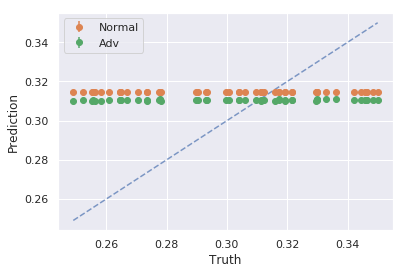

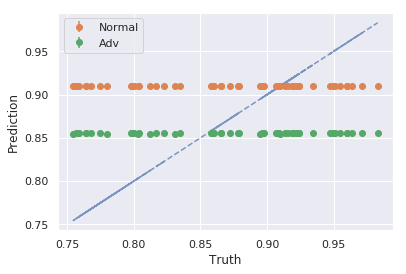

In [83]:
for i in xrange(2):
    plt.plot(cosmo_true[:,i], cosmo_true[:,i], ls = '--', alpha = 0.7)
    plt.errorbar(cosmo_true[:, i], cosmo_preds[:,i], yerr = cosmo_preds[:,i+2], fmt = 'o', label = 'Normal')
    nonzero_idxs = np.where(np.all(cosmo_preds_attacked != 0.0, axis =1))[0]
    plt.errorbar(cosmo_true[nonzero_idxs, i], cosmo_preds_attacked[nonzero_idxs,i],\
                 yerr = cosmo_preds[nonzero_idxs,i+2], fmt = 'o', label = 'Adv')

    plt.legend(loc = 'best')
    plt.ylabel('Prediction')
    plt.xlabel('Truth')
    plt.show()